In [1]:
import pandas as pd
df=pd.read_csv("/content/Attrition Data.csv")

For different departments find the mean age of the employees who have left the company.


In [2]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [3]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [4]:
sdf=df[df["Attrition"]=="Yes"]
sdf.groupby("Department")["Age"].mean().reset_index()

,Department,Age
0,Human Resources,30.083333
1,Research & Development,33.473684
2,Sales,34.260870


For different departments find the distance from home which is covered by the maximum number of employees to get to the company. ( Hint: Use Mode)

In [5]:
df.groupby(["Department"])["DistanceFromHome"].agg(pd.Series.mode)

Department
Human Resources           2
Research & Development    1
Sales                     2
Name: DistanceFromHome, dtype: int64

The company wants to compare the average salary of employees who have left the job and those who haven’t. Do the analysis for different Departments.

In [6]:
a=df[df["Attrition"]=="No"]
ina=df[df["Attrition"]=="Yes"]

m_a=a.groupby("Department")["MonthlyIncome"].mean()
m_ina=ina.groupby("Department")["MonthlyIncome"].mean()

pd.merge(m_a, m_ina,on="Department",suffixes=("No", "Yes"))



,MonthlyIncomeNo,MonthlyIncomeYes
Department,,
Human Resources,7345.980392,3715.750000
Research & Development,6630.326087,4108.075188
Sales,7232.240113,5908.456522


The company wants to analyze the median of job satisfaction ratings for different marital statuses.

In [7]:
df.groupby("MaritalStatus")["JobSatisfaction"].median()

MaritalStatus
Divorced    3.0
Married     3.0
Single      3.0
Name: JobSatisfaction, dtype: float64

Find the mean of environment satisfaction rating for the employees with different Education Field.

In [8]:
df.groupby("EducationField")["EnvironmentSatisfaction"].mean()

EducationField
Human Resources     2.666667
Life Sciences       2.689769
Marketing           2.723270
Medical             2.687500
Other               3.012195
Technical Degree    2.818182
Name: EnvironmentSatisfaction, dtype: float64

The company wants to know if the employees who have spent good number of years in their company are leaving the company or not. For that, they want to know the average year spent in the company by the employees in different departments.

In [9]:
df.groupby("Department")["YearsAtCompany"].mean()


Department
Human Resources           7.238095
Research & Development    6.864724
Sales                     7.284753
Name: YearsAtCompany, dtype: float64

Find the mean, median, and mode of work-life balance ratings for the employees who are married and are from the medical field.

In [10]:
sdf=df[(df["MaritalStatus"]=="Married")&(df["EducationField"]=="Medical")]

mean=sdf["WorkLifeBalance"].mean()
median=sdf["WorkLifeBalance"].median()
mode=sdf["WorkLifeBalance"].mode()

print(mean,median,mode)


2.7666666666666666 3.0 0    3
dtype: int64


Find the mean, median, and mode of the number of companies the employee has worked for before joining ABC for the employees whose monthly salary is greater than 3000 and are from Research & Development department.

In [11]:
sdf=df[(df["Department"]=="Research & Development")&(df["MonthlyIncome"]>3000)]

mean=sdf["YearsAtCompany"].mean()
median=sdf["YearsAtCompany"].median()
mode=sdf["YearsAtCompany"].mode()

print(mean,median,mode)


8.207575757575757 7.0 0    5
dtype: int64


Create a Correlation matrix as well as the correlation heatmap and find out the following correlation values:
What is the correlation value between the monthly salary and the number of years the employee has worked in that company
What is the correlation value between the monthly salary and the age of the employee.

                              Age  DistanceFromHome  Education  \
Age                      1.000000         -0.001686   0.208034   
DistanceFromHome        -0.001686          1.000000   0.021042   
Education                0.208034          0.021042   1.000000   
EnvironmentSatisfaction  0.010146         -0.016075  -0.027128   
JobSatisfaction         -0.004892         -0.003669  -0.011296   
MonthlyIncome            0.497855         -0.017014   0.094961   
NumCompaniesWorked       0.299635         -0.029251   0.126317   
WorkLifeBalance         -0.021490         -0.026556   0.009819   
YearsAtCompany           0.311309          0.009508   0.069114   

                         EnvironmentSatisfaction  JobSatisfaction  \
Age                                     0.010146        -0.004892   
DistanceFromHome                       -0.016075        -0.003669   
Education                              -0.027128        -0.011296   
EnvironmentSatisfaction                 1.000000        -0.0067

<AxesSubplot:>

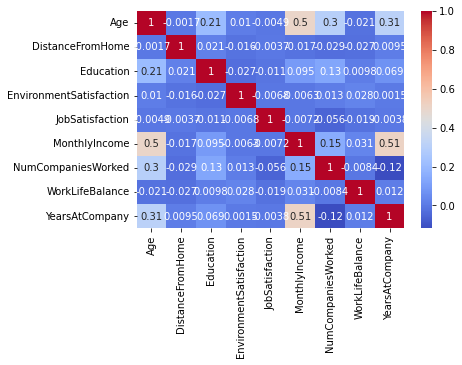

In [12]:
import seaborn as sns
cor_m=df.corr()
print(cor_m)

x=sns.heatmap(cor_m, annot=True, cmap="coolwarm")
x


In [13]:
df["MonthlyIncome"].corr(df["YearsAtCompany"])

0.5142848257331966

In [14]:
df["MonthlyIncome"].corr(df["Age"])

0.4978545669265805

The company has a hypothesis that the attrition rate is higher for employees with low age. Comment on the same.

In [15]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [16]:
df['Age'].unique()


array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [25]:
df['Age'].sort_values().unique()


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [30]:
# we consider low age which is below 39


In [29]:
df['Attrition'].sort_values().unique()

array(['No', 'Yes'], dtype=object)

H0:the attrition rate is higher for employees with low age
H1:the attrition rate is low for employees with low age

In [32]:
age=df[df['Age']>39]

In [38]:
age[age['Attrition']=='Yes']['Attrition'].count()

57

In [39]:
age[age['Attrition']=='No']['Attrition'].count()

465

In [ ]:
# Reject Null Hypothesis H0

In [40]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [42]:
df['MonthlyIncome'].isnull().sum()

0

In [45]:
df['MonthlyIncome'].agg(['mean','median','mode','std'])

ValueError: ignored